# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [1]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

/home/fastik/Projects/datacamp_home_tasks/.virtualenv/datacamp_home_tasks/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [12]:
from collections import namedtuple
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def find_best_number_of_neighbours(X, y) -> tuple[int, float]:
    """
    I guess you have a hint from the name of what it does (。・ω・。)
    Also if I got this right we should find model that performs the best on test dataset, so this is what we are comparing
    """
    result = namedtuple('result', ['n_neighbours', 'score'])
    results = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=np.random.seed)

    for n_neighbours in range(1, len(y_train)):
        classifier = KNeighborsClassifier(n_neighbors=n_neighbours)
        classifier.fit(X_train, y_train)
        results.append(result(n_neighbours=n_neighbours, score=classifier.score(X_test, y_test)))
    
    return max(results, key=lambda x: x.score)

In [26]:
k_best, score_best = find_best_number_of_neighbours(X, y)
print ('The best k = {} , score = {}'.format(k_best, score_best))

The best k = 8 , score = 1.0


## Synthetic dataset  

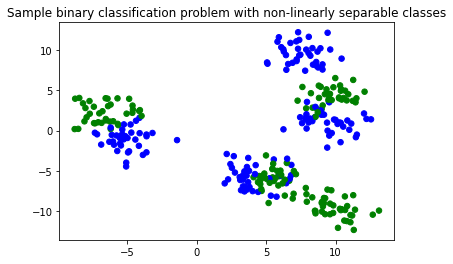

In [16]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)



In [30]:
k_best, score_best = find_best_number_of_neighbours(X_D2, y_D2) # 'compute the best k'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 33 , score = 0.92


/tmp/ipykernel_647/741306303.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)


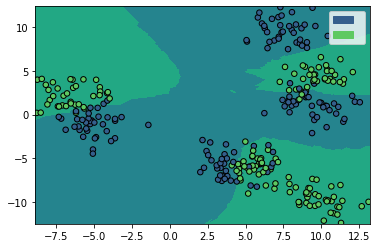

In [50]:
# visualize decisiaon boundary
from matplotlib.colors import  ListedColormap
import matplotlib as mpl
import matplotlib.patches as mpatches

colors_for_areas= [mpl.cm.viridis(.45),mpl.cm.viridis(.6)]
colors_for_points = [mpl.cm.viridis(.3),mpl.cm.viridis(.75)]
cmap_light = ListedColormap(colors_for_areas)
cmap_bold  = ListedColormap(colors_for_points)

x1_min, x1_max = X_D2[:, 0].min() - .1, X_D2[:, 0].max() + 0.1
x2_min, x2_max = X_D2[:, 1].min() - .1, X_D2[:, 1].max() + 0.1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                        np.arange(x2_min, x2_max, 0.01))

target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=np.random.seed)
knn = KNeighborsClassifier(k_best)
knn.fit(X_train[:,:2], y_train)

Z = knn.predict(target_samples_grid)

Z = Z.reshape(xx1.shape)
plt.figure()
plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

plt.scatter(X_D2[:, 0], X_D2[:, 1], marker='o', s=30, c=y_D2.ravel(), cmap=cmap_bold, edgecolor = 'black')

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

patch0 = mpatches.Patch(color=colors_for_points[0])
patch1 = mpatches.Patch(color=colors_for_points[1])
plt.legend(handles=[patch0, patch1])

plt.show()